In [1]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Simón Cortés Ocampo

*Identificación:* CC 1027800060

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



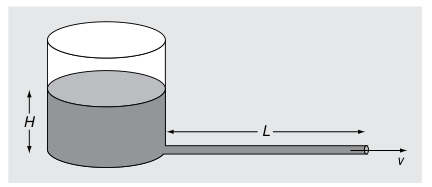

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [160]:
#a

def velocidad_descarga(H, L, t, g = 9.81):
  v = np.sqrt(2*g*H) * np.tanh(((np.sqrt(2*g*H))/(2*L)) * t)
  return v

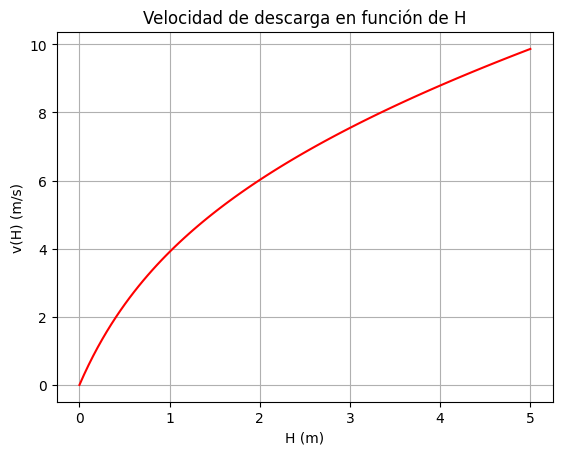

In [161]:
#b

L = 4
t = 2.5

H = np.linspace(0,5,100)

v=velocidad_descarga(H,L,t)

plt.plot(H, v, 'r-')
plt.title('Velocidad de descarga en función de H')
plt.xlabel('H (m)')
plt.ylabel('v(H) (m/s)')
plt.grid()
plt.show()

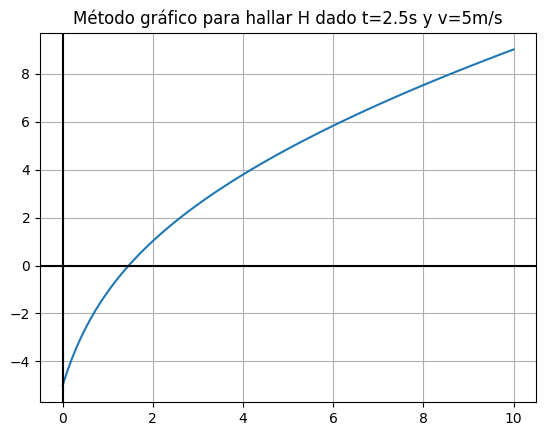

In [162]:
#c) Suponga que quiere conocer la carga hidrostática (H) necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

t_objetivo = 2.5
v_objetivo = 5
g = 9.81
L = 4

def ecuacion(H):
  f_H = (np.sqrt(2*g*H) * np.tanh(((np.sqrt(2*g*H))/(2*L))*t_objetivo))-v_objetivo
  return f_H

x_vals= np.linspace(0,10,100)
f_H = ecuacion(x_vals)

plt.plot(x_vals, f_H)
plt.title('Método gráfico para hallar H dado t=2.5s y v=5m/s')
plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.grid()
plt.show()

Podemos ver que que la gráfica se anula en, aproximadamente, 1.5. Por lo tanto, este es el valor de H en el que la velocidad es 5m/s pasados t=2.5s

In [163]:
#d  Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7

def biseccion(f,a,b,tol=1e-7):
  while (b-a)/2 > tol:
    c = (a+b)/2
    if f(c)==0:
      return c
    elif f(a)*f(c) <  0:
      b = c
    else:
      a = c
  return (a+b)/2

t= 2.5
v = 5
g = 9.81
L = 4

f= lambda H : (np.sqrt(2*g*H) * np.tanh(((np.sqrt(2*g*H))/(2*L))*t))-v
a = 1
b = 2

raiz = biseccion(f,a,b)
print(f'La raíz con el método de bisección es: {raiz}')

La raíz con el método de bisección es: 1.465894639492035


In [164]:
#e) Usando el método de scipy.newton encuentre el valor de la raiz

raiz_newton = newton(f, 1)
print(f'La raíz con el método de Newton es {raiz_newton}')

error_relativo = np.abs(raiz - raiz_newton)/raiz_newton
print(f'El error relativo es {error_relativo}')

La raíz con el método de Newton es 1.4658945884767882
El error relativo es 3.480144281501071e-08


# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




Las derivadas son: [-0.104   -0.04425 -0.03125 -0.022   -0.0155  -0.026  ]


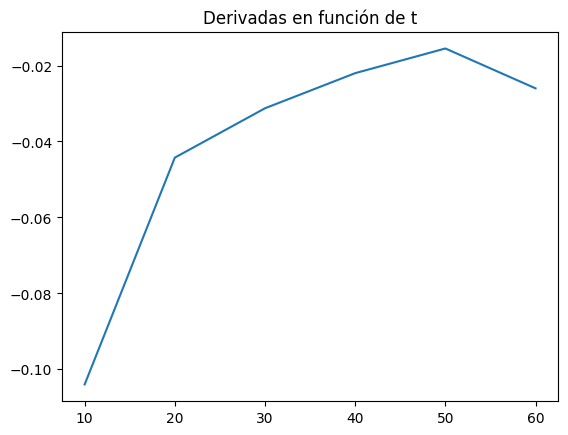

In [165]:
#a

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

def dc_dt(t,c):
  n = len(t)
  derivada = np.zeros(n)
  for i in range(n):
    if i == 0:
      derivada[i] = (c[i+1]-c[i])/(t[i+1]-t[i])
    elif i == n - 1:
      derivada[i] = (c[i]-c[i-1])/(t[i]-t[i-1])
    else:
      derivada[i] = (c[i+1]-c[i-1])/(2*(t[i+1]-t[i-1]))
  return derivada

derivada = dc_dt(t,c)
print(f'Las derivadas son: {derivada}')

plt.plot(t,derivada)
plt.title('Derivadas en función de t')
plt.show()

In [167]:
#b

derivada_np = np.gradient(c,t)
print(derivada_np)


[-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]


Las derivadas por ambos métodos son iguales para el primer y último valor, y para los del medio coinciden hasta el primer decimal.

 c)  
  $$
  \frac{dc}{dt} = -kc^n
  $$

  $$
  -\frac{dc}{dt} = kc^n
  $$

  $$
  \ln(-\frac{dc}{dt} ) = \ln(kc^n)
  $$

  $$
  \ln(-\frac{dc}{dt} ) = n\ln(c) + \ln(k)
  $$

  $$
  y = mx + b
  $$

In [168]:
#c

# y = np.log(-derivada_np)
# x = np.ln(c)
# m = n
# b = np.ln(k)

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

dc_dt = derivada_np

log_c = np.log(c)
log_dcdt = np.log(-dc_dt)

slope, intercept, r_value, p_value, std_err = linregress(log_c, log_dcdt)

n = slope
k = np.exp(intercept)

print(f'El valor de k es aproximadamente: {k}')
print(f'El valor de n es aproximadamente: {n}')


El valor de k es aproximadamente: 0.03772872029740847
El valor de n es aproximadamente: 0.8506440749751021


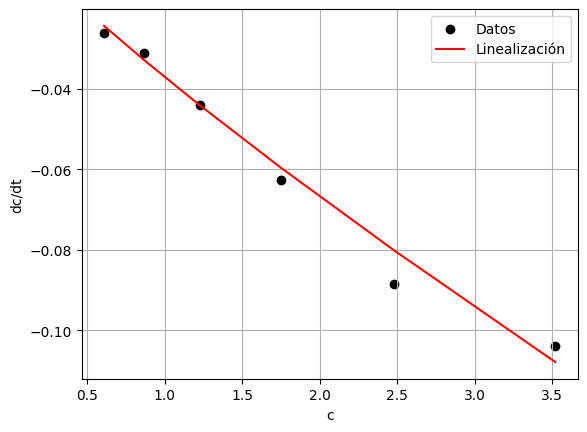

El error máximo es 0.008427082459474697


In [169]:
#d

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

k = 0.037
n = 0.850

dc_dt = derivada_np
dc_dt_ = -k*c**n

plt.scatter(c, dc_dt, label='Datos', color='black')
plt.plot(c, dc_dt_, 'r-', label='Linealización')
plt.xlabel('c')
plt.ylabel('dc/dt')
plt.grid()
plt.legend()
plt.show()

error_max = np.max(np.abs(dc_dt - dc_dt_))

print(f'El error máximo es {error_max}')

Aunque no son iguales, los datos se comportan de manera muy similar a los de la tabla.

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




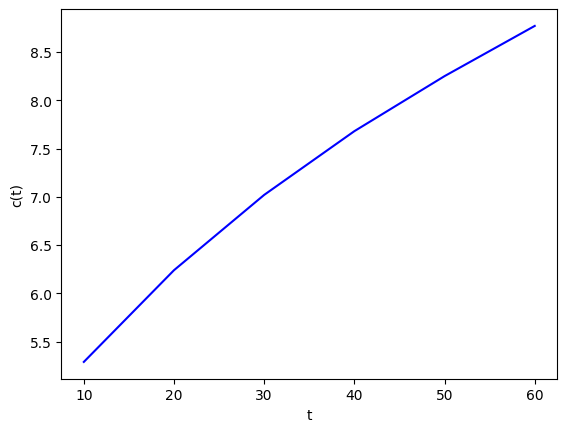

In [170]:
#a


t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])


plt.plot(t,c, 'b-')
plt.xlabel('t')
plt.ylabel('c(t)')
plt.show()

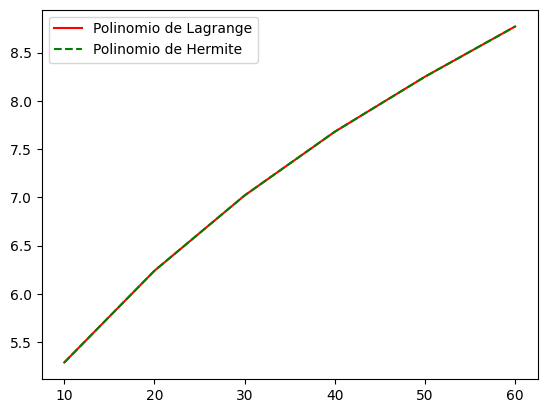

In [171]:
#b

from scipy.interpolate import CubicHermiteSpline

poly_lagrange = lagrange(t,c)
poly_hermite = CubicHermiteSpline(t,c,derivada)

func_lagrange = poly_lagrange(t)
func_hermite = poly_hermite(t)
plt.plot(t, func_lagrange, 'r-' ,label = 'Polinomio de Lagrange')
plt.plot(t, func_hermite, 'g--' ,label = 'Polinomio de Hermite')
plt.legend()
plt.show()


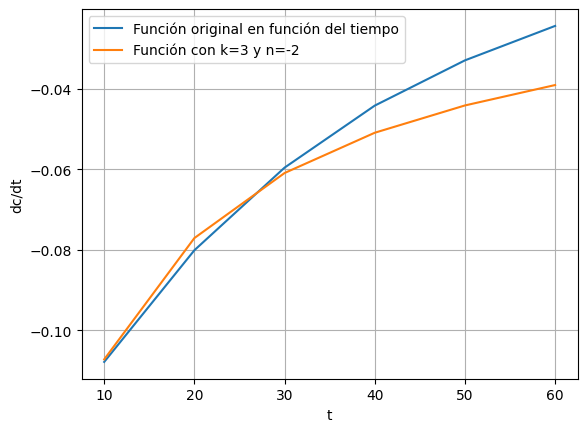

In [172]:
#c

from numpy.polynomial.polynomial import Polynomial

poly_coef = Polynomial(poly_lagrange.coef[::-1])
derivative = poly_coef.deriv()

nuevo_dc_dt_ = -3*c**-2

plt.plot(t, dc_dt_, label = 'Función original en función del tiempo')
plt.plot(t, nuevo_dc_dt_, label = 'Función con k=3 y n=-2')
plt.xlabel('t')
plt.ylabel('dc/dt')
plt.grid()
plt.legend()
plt.show()

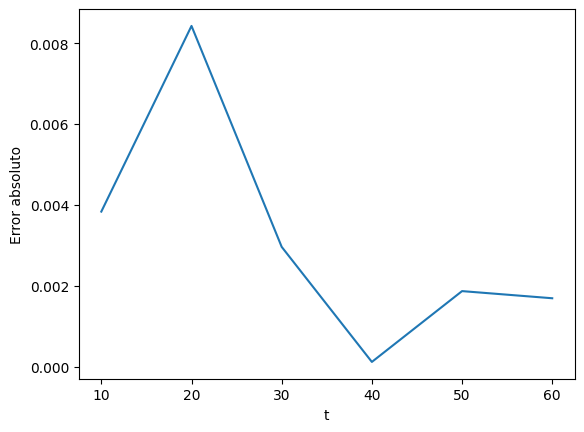

In [173]:
#d

error_absoluto = np.abs(dc_dt - dc_dt_)
plt.plot(t, error_absoluto)
plt.xlabel('t')
plt.ylabel('Error absoluto')
plt.show()